# COVID-19 Prediction Based on Symptoms

## Introduction

COVID-19 has impacted millions of lives globally. Accurate prediction of COVID-19 based on symptoms can aid in early diagnosis and treatment.
## Objective
This project aims to predict COVID-19 diagnosis using machine learning models based on symptoms and demographic information. The dataset contains records of individuals tested for COVID-19, including their symptoms, demographic data, and test results. The project includes data cleaning, feature engineering, exploratory data analysis (EDA), machine learning model training, and evaluation.

The goal of this project is to develop a machine learning model to predict COVID-19 diagnosis based on symptoms. This project aims to provide timely medical interventions and reduce the healthcare burden by identifying potential COVID-19 cases early.

##Importance
- Accurate prediction of COVID-19 can lead to timely medical interventions, reducing transmission and improving patient outcomes.
- Effective screening based on symptoms can prioritize testing resources, especially during pandemics, thereby reducing healthcare system overload.

**Hypothesis**
1.   Individuals with a higher symptoms are more likely to test positive for COVID-19.
2.   Random Forest is going to predict corona virus better than linear regression



**Data Analysis Approach**

In [382]:
#importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [383]:
# Loading the Dataset
df=pd.read_csv('/content/corona_tested_006.csv')
df.head()

<ipython-input-383-c7d2c3f0a89c>:2: DtypeWarning: Columns (2,3,4,5,6,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('/content/corona_tested_006.csv')


,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,True,False,True,False,False,negative,NaN,NaN,Abroad
1,2,11-03-2020,False,True,False,False,False,positive,NaN,NaN,Abroad
2,3,11-03-2020,False,True,False,False,False,positive,NaN,NaN,Abroad
3,4,11-03-2020,True,False,False,False,False,negative,NaN,NaN,Abroad
4,5,11-03-2020,True,False,False,False,False,negative,NaN,NaN,Contact with confirmed


 ### **Data Description**
The dataset contains information about individuals tested for COVID-19, including symptoms, demographic information, and test results. The data was collected from 11th March 2020 to 30th April 2020 and contains 278,848 samples with 11 columns.

### Features:
1. ID: Individual identification number.
2. Sex: Gender of the individual (male/female).
3. Age ≥ 60 Above: Boolean indicating whether the person is aged 60 or above (true/false).
4. Test Date: Date when the COVID-19 test was conducted.
* Symptoms:
1. Cough: Presence or absence of a cough (true/false).
2. Fever: Presence or absence of fever (true/false).
3. Sore Throat: Presence or absence of a sore throat (true/false).
4. Shortness of Breath: Presence or absence of breathing difficulty (true/false).
5. Headache: Presence or absence of a headache (true/false).
* Known Contact: Whether the individual had known contact with a confirmed COVID-19 case (true/false).
* COVID Result: The outcome variable indicating COVID test results (positive/negative).

**EDA**

In [384]:
df.shape

(278848, 11)

In [385]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Ind_ID               278848 non-null  int64 
 1   Test_date            278848 non-null  object
 2   Cough_symptoms       278596 non-null  object
 3   Fever                278596 non-null  object
 4   Sore_throat          278847 non-null  object
 5   Shortness_of_breath  278847 non-null  object
 6   Headache             278847 non-null  object
 7   Corona               278848 non-null  object
 8   Age_60_above         151528 non-null  object
 9   Sex                  259285 non-null  object
 10  Known_contact        278848 non-null  object
dtypes: int64(1), object(10)
memory usage: 23.4+ MB


In [386]:
# Unique values in each column
for i in df:
  print(i, "i" ,df[i].unique())

Ind_ID i [     1      2      3 ... 278846 278847 278848]
Test_date i ['11-03-2020' '12-03-2020' '13-03-2020' '14-03-2020' '15-03-2020'
 '16-03-2020' '17-03-2020' '18-03-2020' '19-03-2020' '20-03-2020'
 '21-03-2020' '22-03-2020' '23-03-2020' '24-03-2020' '25-03-2020'
 '26-03-2020' '27-03-2020' '28-03-2020' '29-03-2020' '30-03-2020'
 '31-03-2020' '01-04-2020' '02-04-2020' '03-04-2020' '04-04-2020'
 '05-04-2020' '06-04-2020' '07-04-2020' '08-04-2020' '09-04-2020'
 '10-04-2020' '11-04-2020' '12-04-2020' '13-04-2020' '14-04-2020'
 '15-04-2020' '16-04-2020' '17-04-2020' '18-04-2020' '19-04-2020'
 '20-04-2020' '21-04-2020' '22-04-2020' '23-04-2020' '24-04-2020'
 '25-04-2020' '26-04-2020' '27-04-2020' '28-04-2020' '29-04-2020'
 '30-04-2020']
Cough_symptoms i [True False nan]
Fever i [False True nan]
Sore_throat i [True False nan]
Shortness_of_breath i [False True nan]
Headache i [False True nan]
Corona i ['negative' 'positive' 'other']
Age_60_above i [nan 'No' 'Yes']
Sex i [nan 'male' 'female'

In [387]:
# Checking for missing values
df.isnull().sum()

Ind_ID                      0
Test_date                   0
Cough_symptoms            252
Fever                     252
Sore_throat                 1
Shortness_of_breath         1
Headache                    1
Corona                      0
Age_60_above           127320
Sex                     19563
Known_contact               0
dtype: int64

Most of the columns have missing values

###Data Cleaning And Preparation

**Data Cleanup**

In [388]:
# Replace 'other' in 'Corona' column with NaN
df['Corona'] = df['Corona'].replace({'other': np.nan})
df['Known_contact'] = df['Known_contact'].replace({'Other': np.nan})

In [389]:
df.isnull().mean()

Ind_ID                 0.000000
Test_date              0.000000
Cough_symptoms         0.000904
Fever                  0.000904
Sore_throat            0.000004
Shortness_of_breath    0.000004
Headache               0.000004
Corona                 0.013957
Age_60_above           0.456593
Sex                    0.070157
Known_contact          0.870514
dtype: float64

Used CCA (Complete case analysis) to handle missing values that are less than 5%.

In [390]:
# Filtering Columns with low missing values
cols= [var for var in df.columns if df[var].isnull().mean()<0.05 and df[var].isnull().mean()>0]
cols

['Cough_symptoms',
 'Fever',
 'Sore_throat',
 'Shortness_of_breath',
 'Headache',
 'Corona']

In [391]:
len(df[cols].dropna())/len(df)

0.9851316846453982

After dropping the columns with missing values 98% of the data is left.

In [392]:
#Dropping rows with Missing Values:
new_df=df[cols].dropna()

In [393]:
#Subsetting Original DataFrame
new_df_full = df.loc[new_df.index]
df.shape, new_df.shape, new_df_full.shape

((278848, 11), (274702, 6), (274702, 11))

df is the original dataset
new_df is the dataset containing only rows where all selected columns (cols) have no missing values.
new_df_full which is a subset of the original dataframe df containing only rows present in new_df

In [394]:
#Comparing Distributions of all the cols before and after applying CCA
from IPython.display import display

# 1: For corona
temp1 = pd.concat([
    df['Corona'].value_counts() / len(df),
    new_df['Corona'].value_counts() / len(new_df)
], axis=1)
temp1.columns = ['original', 'new']
display(temp1)

# 2: For cough symptoms
temp2 = pd.concat([
    df['Cough_symptoms'].value_counts() / len(df),
    new_df['Cough_symptoms'].value_counts() / len(new_df)
], axis=1)
temp2.columns = ['original', 'new']
display(temp2)

# 3: For sore throat
temp3 = pd.concat([
    df['Sore_throat'].value_counts() / len(df),
    new_df['Sore_throat'].value_counts() / len(new_df)
], axis=1)
temp3.columns = ['original', 'new']
display(temp3)

# 4: For shortness of breath
temp4 = pd.concat([
    df['Shortness_of_breath'].value_counts() / len(df),
    new_df['Shortness_of_breath'].value_counts() / len(new_df)
], axis=1)
temp4.columns = ['original', 'new']
display(temp4)

# 5: For Fever
temp5 = pd.concat([
    df['Fever'].value_counts() / len(df),
    new_df['Fever'].value_counts() / len(new_df)
], axis=1)
temp5.columns = ['original', 'new']
display(temp5)

# 6: For headache
temp6 = pd.concat([
    df['Headache'].value_counts() / len(df),
    new_df['Headache'].value_counts() / len(new_df)
], axis=1)
temp6.columns = ['original', 'new']
display(temp6)


,original,new
Corona,,
negative,0.933222,0.946509
positive,0.052821,0.053491


,original,new
Cough_symptoms,,
False,0.847659,0.848676
True,0.151437,0.151324


,original,new
Sore_throat,,
False,0.993089,0.993127
True,0.006907,0.006873


,original,new
Shortness_of_breath,,
False,0.994341,0.994372
True,0.005655,0.005628


,original,new
Fever,,
False,0.921090,0.922192
True,0.078007,0.077808


,original,new
Headache,,
False,0.991339,0.991347
True,0.008657,0.008653


The data before and after applying CCA is comparable which suggests that CCA was a suitable choice.

In [395]:
new_df_full.isnull().mean()

Ind_ID                 0.000000
Test_date              0.000000
Cough_symptoms         0.000000
Fever                  0.000000
Sore_throat            0.000000
Shortness_of_breath    0.000000
Headache               0.000000
Corona                 0.000000
Age_60_above           0.457438
Sex                    0.069290
Known_contact          0.870642
dtype: float64

The Age_60_above and Sex columns have missing values, which need to be addressed during data preprocessing.

In [396]:
# Fill missing values
age_60_above_mode = new_df_full['Age_60_above'].mode()[0]
new_df_full['Age_60_above'].fillna(age_60_above_mode, inplace=True)

sex_mode = new_df_full['Sex'].mode()[0]
new_df_full['Sex'].fillna(sex_mode, inplace=True)

Known_contact_mode = new_df_full['Known_contact'].mode()[0]
new_df_full['Known_contact'].fillna(Known_contact_mode, inplace=True)

**Data Transformation**

In [397]:
# Handling date format
df['Test_date'] = pd.to_datetime(df['Test_date'], format='%d-%m-%Y', errors='coerce')

In [398]:
#Save the cleaned dataset to a CSV file
new_df_full.to_csv('cleaned_dataset.csv', index=False)

In [399]:
#Download the CSV file
from google.colab import files
files.download('cleaned_dataset.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [400]:
# Dropping column that might not be used
column_to_drop = ['Ind_ID']
new_df_full.drop(columns=column_to_drop, inplace=True)

###Feature Engineering

In [401]:
new_df_full['Cough_symptoms'] = new_df_full['Cough_symptoms'].replace({'TRUE': True, 'FALSE': False})
new_df_full['Fever'] = new_df_full['Fever'].replace({'TRUE': True, 'FALSE': False})
new_df_full['Sore_throat'] = new_df_full['Sore_throat'].replace({'TRUE': True, 'FALSE': False})
new_df_full['Shortness_of_breath'] = new_df_full['Shortness_of_breath'].replace({'TRUE': True, 'FALSE': False})
new_df_full['Headache'] = new_df_full['Headache'].replace({'TRUE': True, 'FALSE': False})

In [402]:
# Convert boolean symptom columns to numeric
symptoms = ['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath', 'Headache']
for col in symptoms:
    new_df_full[col] = new_df_full[col].replace({True: 1, False: 0})

###Feature Construction

In [403]:
new_df_full['Symptom_severity'] = (new_df_full['Cough_symptoms'].astype(int) +
                                   new_df_full['Fever'].astype(int) +
                                   new_df_full['Sore_throat'].astype(int) +
                                   new_df_full['Shortness_of_breath'].astype(int) +
                                   new_df_full['Headache'].astype(int))


In [404]:
categorical_cols = ['Corona', 'Age_60_above','Sex','Known_contact']
for col in categorical_cols:
    new_df_full[col] = new_df_full[col].astype('category')

In [405]:
# Convert categorical variables to numeric
new_df_full['Age_60_above'] = new_df_full['Age_60_above'].map({'No': 0, 'Yes': 1})
new_df_full['Sex'] = new_df_full['Sex'].map({'male': 0, 'female': 1})
new_df_full['Corona'] = new_df_full['Corona'].map({'negative': 0, 'positive': 1})
new_df_full['Known_contact'] = new_df_full['Known_contact'].map({'Abroad': 0, 'Contact with confirmed': 1})

In [406]:
new_df_full.sample(5)

,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact,Symptom_severity
256767,27-04-2020,0,0,0,0,0,0,0,1,0,0
94243,04-04-2020,0,0,0,0,0,0,1,0,0,0
27838,25-03-2020,0,0,0,0,0,0,1,1,0,0
23011,24-03-2020,0,0,0,1,0,1,0,0,0,1
68595,01-04-2020,0,0,0,0,0,0,1,1,0,0


In [407]:
new_df_full.isnull().mean()

Test_date              0.0
Cough_symptoms         0.0
Fever                  0.0
Sore_throat            0.0
Shortness_of_breath    0.0
Headache               0.0
Corona                 0.0
Age_60_above           0.0
Sex                    0.0
Known_contact          0.0
Symptom_severity       0.0
dtype: float64

###Data Visualization

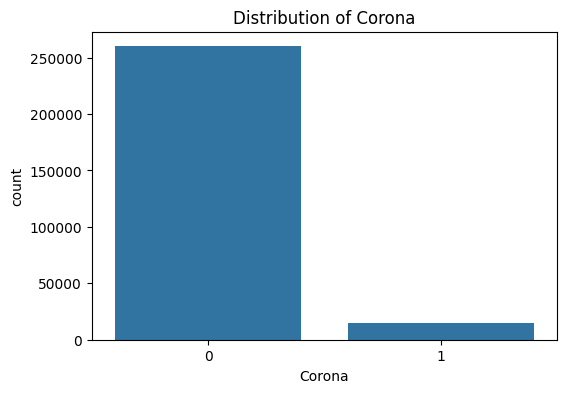

In [408]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Corona', data=new_df_full)
plt.title('Distribution of Corona')
plt.show()

After visualizing the data, we observed
1. A significant class imbalance, where the majority of cases were negative for COVID-19, and there were notably fewer positive cases. This imbalance is a common scenario in medical datasets, where the disease class (positive cases) tends to be the minority class.This is because diseases are generally less prevalent in the population than non-disease conditions


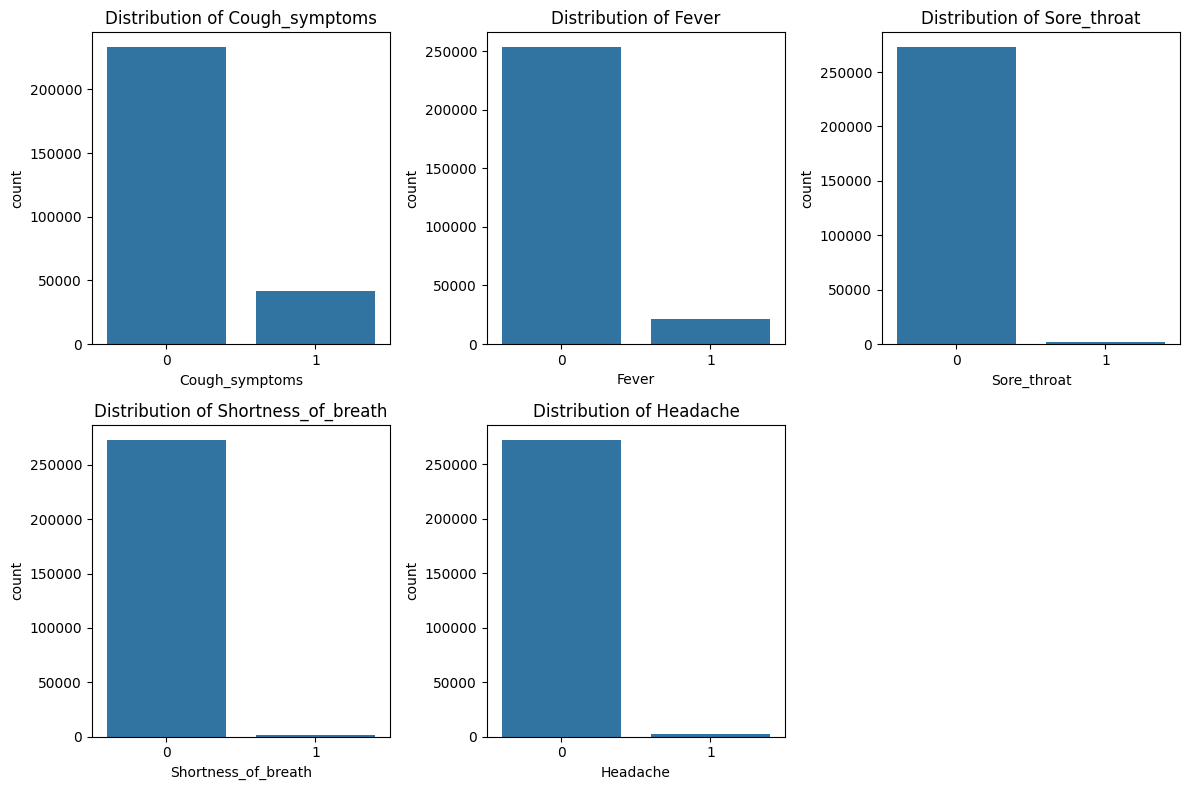

In [409]:
symptoms = ['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath', 'Headache']

plt.figure(figsize=(12, 8))
for i, symptom in enumerate(symptoms):
    plt.subplot(2, 3, i + 1)
    sns.countplot(data=new_df_full, x=symptom)
    plt.title(f'Distribution of {symptom}')
plt.tight_layout()
plt.show()

Most symptoms are relatively rare in the dataset.Fever and cough are among the more common symptoms.

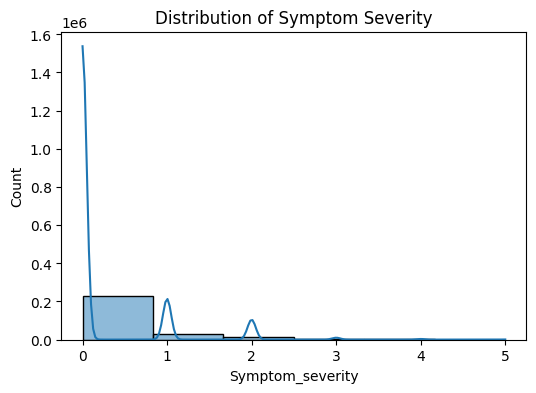

In [410]:
plt.figure(figsize=(6, 4))
sns.histplot(data=new_df_full, x='Symptom_severity', bins=6, kde=True)
plt.title('Distribution of Symptom Severity')
plt.show()

The symptom severity score ranges from 0 to 5, with a majority of individuals having low severity scores.

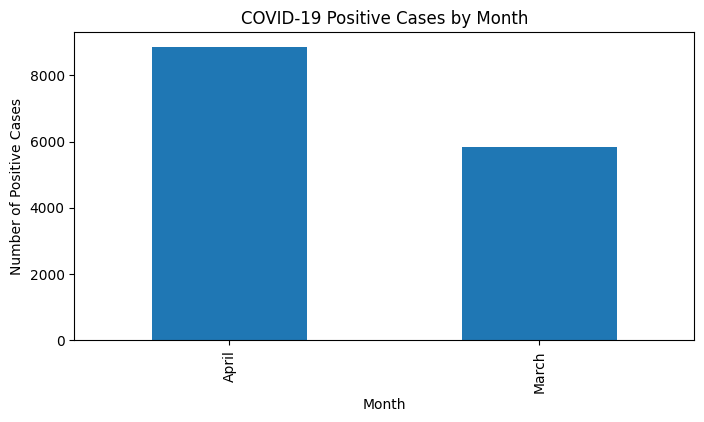

In [411]:
new_df_full['Test_date'] = pd.to_datetime(new_df_full['Test_date'], format='%d-%m-%Y')
new_df_full['Month'] = new_df_full['Test_date'].dt.strftime('%B')

positive_cases_by_month = new_df_full[new_df_full['Corona'] == 1]['Month'].value_counts().sort_index()

plt.figure(figsize=(8, 4))
positive_cases_by_month.plot(kind='bar')
plt.title('COVID-19 Positive Cases by Month')
plt.xlabel('Month')
plt.ylabel('Number of Positive Cases')
plt.show()


There were more COVID-19 positive cases in April compared to March.

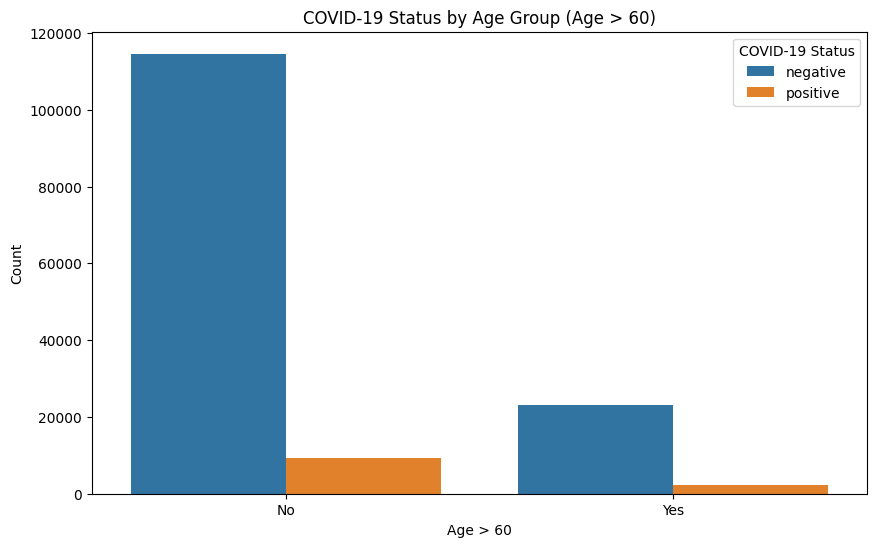

In [412]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Age_60_above', hue='Corona', data=df)
plt.title('COVID-19 Status by Age Group (Age > 60)')
plt.xlabel('Age > 60')
plt.ylabel('Count')
plt.legend(title='COVID-19 Status')
plt.show()

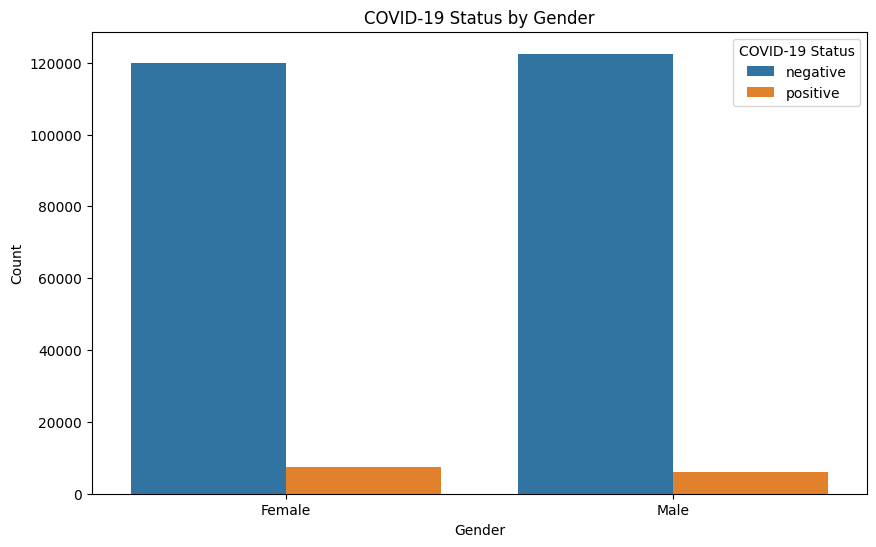

In [413]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Sex', hue='Corona', data=df)
plt.title('COVID-19 Status by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='COVID-19 Status')
plt.xticks([0, 1], ['Female', 'Male'])
plt.show()


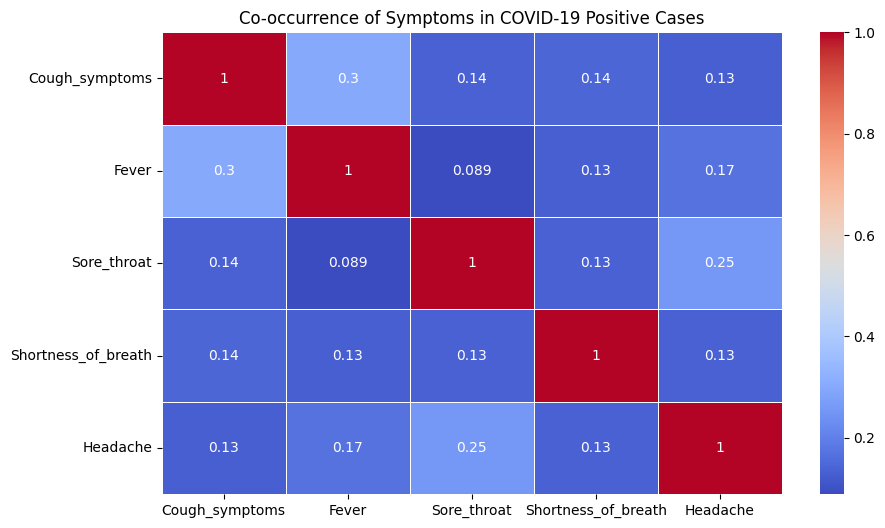

In [414]:
positive_cases = new_df_full[new_df_full['Corona'] == 1]
co_occurrence_matrix = positive_cases[symptoms].astype(int).corr()

plt.figure(figsize=(10, 6))
sns.heatmap(co_occurrence_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Co-occurrence of Symptoms in COVID-19 Positive Cases')
plt.show()


Based on these results,we will reject the null hypothesis that there is no difference in symptom severity between COVID-19 positive and negative cases

In [415]:
# Splitting data
from sklearn.model_selection import train_test_split
train_val_mask = (new_df_full['Test_date'] >= '2020-03-11') & (new_df_full['Test_date'] <= '2020-04-15')
test_mask = (new_df_full['Test_date'] >= '2020-04-16') & (new_df_full['Test_date'] <= '2020-04-30')

train_val_mask = train_val_mask.drop(columns=['Test_date'])
test_mask = test_mask.drop(columns=['Test_date'])

train_val_set = new_df_full[train_val_mask]
test_set = new_df_full[test_mask]

train_set, val_set = train_test_split(train_val_set, test_size=0.20, random_state=42)

print(f'Train set shape: {train_set.shape}')
print(f'Validation set shape: {val_set.shape}')
print(f'Test set shape: {test_set.shape}')


Train set shape: (128370, 12)
Validation set shape: (32093, 12)
Test set shape: (114239, 12)


In [416]:
print('Train set distribution:')
print(train_set['Corona'].value_counts(normalize=True))

print('\nValidation set distribution:')
print(val_set['Corona'].value_counts(normalize=True))

print('\nTest set distribution:')
print(test_set['Corona'].value_counts(normalize=True))

Train set distribution:
Corona
0    0.925014
1    0.074986
Name: proportion, dtype: float64

Validation set distribution:
Corona
0    0.926152
1    0.073848
Name: proportion, dtype: float64

Test set distribution:
Corona
0    0.976383
1    0.023617
Name: proportion, dtype: float64


In [417]:
train_val_size = train_val_set.shape[0]
train_size = train_set.shape[0]
val_size = val_set.shape[0]

ratio = train_size / val_size
print("Ratio between training and validation sets:", ratio)

Ratio between training and validation sets: 3.9999376811142615


In [418]:
print(train_set['Symptom_severity'].describe())

correlation_matrix = train_set[['Symptom_severity', 'Corona']].corr()
print(correlation_matrix)

count    128370.000000
mean          0.307689
std           0.667099
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           5.000000
Name: Symptom_severity, dtype: float64
                  Symptom_severity    Corona
Symptom_severity          1.000000  0.424063
Corona                    0.424063  1.000000


###Model Training and Evaluation

In [419]:
# Define feature columns and target variable
feature_cols = ['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath', 'Headache',
                'Age_60_above', 'Sex', 'Symptom_severity','Known_contact']
target_col = 'Corona'

In [420]:
# Separate features and target for each set

X_train = train_set[feature_cols]
y_train = train_set[target_col]
X_val = val_set[feature_cols]
y_val = val_set[target_col]
X_test = test_set[feature_cols]
y_test = test_set[target_col]

In [421]:
# Importing necessary libraries and modules
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [422]:
# Models to train
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestClassifier(),
    'Perceptron': Perceptron(),
    'KNN': KNeighborsClassifier()
}

In [423]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score

results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_val_pred = model.predict(X_val)

    print(f'{model_name} Validation Results:')
    if model_name == 'Linear Regression':
        y_val_pred = (y_val_pred > 0.5).astype(int)
    else:
        y_val_pred = y_val_pred.astype(int)

    print(f'Accuracy: {accuracy_score(y_val, y_val_pred)}')
    print(f'ROC AUC: {roc_auc_score(y_val, y_val_pred)}')
    print(classification_report(y_val, y_val_pred))
    print(confusion_matrix(y_val, y_val_pred))
    print('\n')

    results[model_name] = {
        'accuracy': accuracy_score(y_val, y_val_pred),
        'roc_auc': roc_auc_score(y_val, y_val_pred),
        'classification_report': classification_report(y_val, y_val_pred, output_dict=True),
        'confusion_matrix': confusion_matrix(y_val, y_val_pred)
    }


Linear Regression Validation Results:
Accuracy: 0.9499579347521266
ROC AUC: 0.7710694711265808
              precision    recall  f1-score   support

           0       0.97      0.98      0.97     29723
           1       0.70      0.56      0.62      2370

    accuracy                           0.95     32093
   macro avg       0.83      0.77      0.80     32093
weighted avg       0.95      0.95      0.95     32093

[[29157   566]
 [ 1040  1330]]


Random Forest Validation Results:
Accuracy: 0.956781852740473
ROC AUC: 0.7825194258491662
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     29723
           1       0.78      0.58      0.66      2370

    accuracy                           0.96     32093
   macro avg       0.87      0.78      0.82     32093
weighted avg       0.95      0.96      0.95     32093

[[29336   387]
 [ 1000  1370]]


Perceptron Validation Results:
Accuracy: 0.9503630075094257
ROC AUC: 0.7858492925750008
       

In [424]:
#Model Comparison
for model_name, metrics in results.items():
    print(f'{model_name}:')
    print(f"Accuracy: {metrics['accuracy']}")
    print(f"ROC AUC: {metrics['roc_auc']}")
    print()


Linear Regression:
Accuracy: 0.9499579347521266
ROC AUC: 0.7710694711265808

Random Forest:
Accuracy: 0.956781852740473
ROC AUC: 0.7825194258491662

Perceptron:
Accuracy: 0.9503630075094257
ROC AUC: 0.7858492925750008

KNN:
Accuracy: 0.9512354719097622
ROC AUC: 0.7991341075991243



Random Forest has the highest accuracy, followed closely by Linear Regression and Perceptron, with KNN having the lowest accuracy among the models.
In terms of ROC AUC score, KNN performs the best, indicating its effectiveness in distinguishing between positive and negative cases.

In [425]:
best_model_name = 'Random Forest'
best_model = models[best_model_name]

X_train_val = pd.concat([X_train, X_val])
y_train_val = pd.concat([y_train, y_val])
best_model.fit(X_train_val, y_train_val)

RandomForestClassifier()

In [426]:
y_test_pred = best_model.predict(X_test)
print('Final Model Test Results:')
print(f'Accuracy: {accuracy_score(y_test, y_test_pred)}')
print(f'ROC AUC: {roc_auc_score(y_test, y_test_pred)}')
print(classification_report(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))

Final Model Test Results:
Accuracy: 0.9837533591855671
ROC AUC: 0.7162611671233471
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    111541
           1       0.78      0.44      0.56      2698

    accuracy                           0.98    114239
   macro avg       0.88      0.72      0.78    114239
weighted avg       0.98      0.98      0.98    114239

[[111208    333]
 [  1523   1175]]


<ipython-input-427-e6f9c6335690>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=accuracies, palette='viridis')


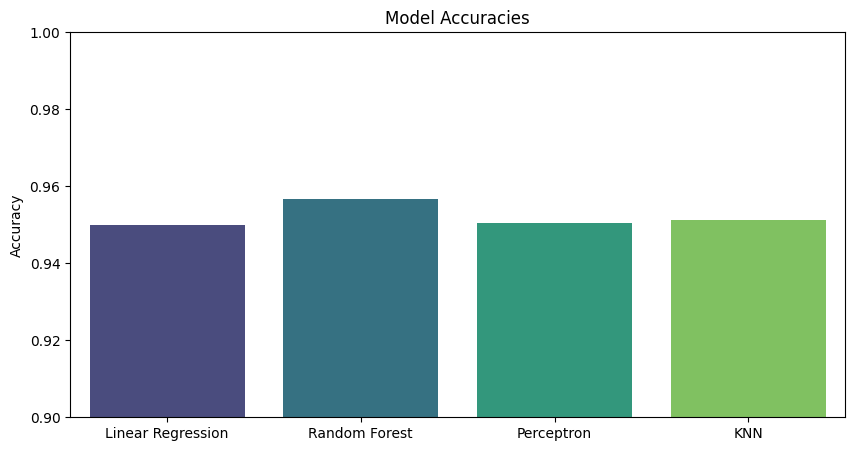

<ipython-input-427-e6f9c6335690>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=roc_aucs, palette='viridis')


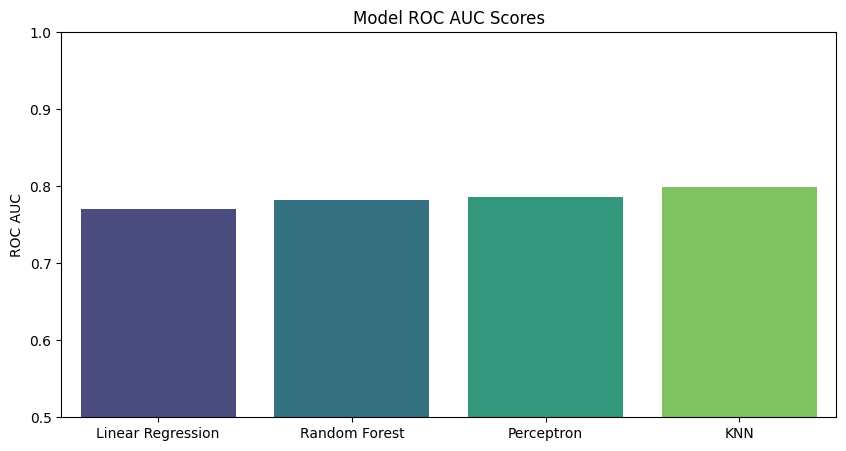

In [427]:
import matplotlib.pyplot as plt
import seaborn as sns

model_names = list(results.keys())
accuracies = [metrics['accuracy'] for metrics in results.values()]
roc_aucs = [metrics['roc_auc'] for metrics in results.values()]

plt.figure(figsize=(10, 5))
sns.barplot(x=model_names, y=accuracies, palette='viridis')
plt.title('Model Accuracies')
plt.ylabel('Accuracy')
plt.ylim(0.9, 1.0)
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(x=model_names, y=roc_aucs, palette='viridis')
plt.title('Model ROC AUC Scores')
plt.ylabel('ROC AUC')
plt.ylim(0.5, 1.0)
plt.show()

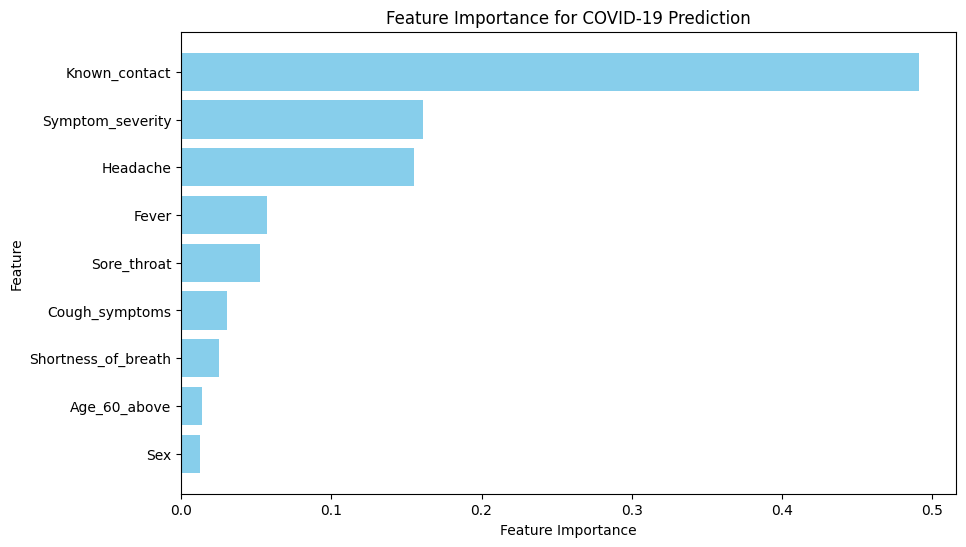

In [428]:
#Feature Importance using Random Forest
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

rf_model = RandomForestClassifier()
rf_model.fit(X_train_val, y_train_val)

feature_importances = rf_model.feature_importances_

features_df = pd.DataFrame({
    'Feature': feature_cols,
    'Importance': feature_importances
})

features_df = features_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(features_df['Feature'], features_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for COVID-19 Prediction')
plt.gca().invert_yaxis()
plt.show()


1. Known_contact is the most significant feature in predicting COVID-19 positivity.
2. Headache is the second most important symptom, which might indicate that it's a strong indicator of COVID-19 in this dataset, even more so than some other respiratory symptoms.
3. Demographic features like Age_60_above and Sex are less significant in this dataset compared to symptoms and known contacts.

###SQL Part

In [429]:
!pip install -q pandasql

In [430]:
import pandas as pd
from pandasql import sqldf
import duckdb

In [431]:
df = pd.read_csv('/content/cleaned_dataset.csv')

In [432]:
conn=duckdb.connect()
conn.register('df',df)
conn.execute("Select * from df").fetchdf()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,True,False,True,False,False,negative,No,female,Abroad
1,2,11-03-2020,False,True,False,False,False,positive,No,female,Abroad
2,3,11-03-2020,False,True,False,False,False,positive,No,female,Abroad
3,4,11-03-2020,True,False,False,False,False,negative,No,female,Abroad
4,5,11-03-2020,True,False,False,False,False,negative,No,female,Contact with confirmed
...,...,...,...,...,...,...,...,...,...,...,...
274697,278844,30-04-2020,False,False,False,False,False,positive,No,male,Abroad
274698,278845,30-04-2020,False,False,False,False,False,negative,No,female,Abroad
274699,278846,30-04-2020,False,False,False,False,False,negative,No,male,Abroad
274700,278847,30-04-2020,False,False,False,False,False,negative,No,male,Abroad


In [433]:
conn.execute("""
SELECT
    COUNT(*) as TotalPatients,
    SUM(CASE WHEN Corona = 'positive' THEN 1 ELSE 0 END) as CoronaPositivePatients,
    SUM(CASE WHEN Corona = 'negative' THEN 1 ELSE 0 END) as CoronaNegativePatients,
    SUM(CASE WHEN Corona = 'positive' AND Sex = 'male' THEN 1 ELSE 0 END) as MaleCoronaPositivePatients,
    SUM(CASE WHEN Corona = 'positive' AND Sex = 'female' THEN 1 ELSE 0 END) as FemaleCoronaPositivePatients,
    SUM(CASE WHEN Corona = 'negative' AND Sex = 'male' THEN 1 ELSE 0 END) as MaleCoronaNegativePatients,
    SUM(CASE WHEN Corona = 'negative' AND Sex = 'female' THEN 1 ELSE 0 END) as FemaleCoronaNegativePatients
FROM df
""").fetchdf()

,TotalPatients,CoronaPositivePatients,CoronaNegativePatients,MaleCoronaPositivePatients,FemaleCoronaPositivePatients,MaleCoronaNegativePatients,FemaleCoronaNegativePatients
0,274702,14694.0,260008.0,7507.0,7187.0,119748.0,140260.0


The dataset contains a total of 274,702 individuals, out of which 14,694 tested positive for COVID-19 and 260,008 tested negative. Among the positive cases, 7,507 are male and 7,187 are female. For the negative cases, 119,748 are male and 140,260 are female. This indicates a fairly balanced gender distribution among the positive and negative cases.

In [434]:
conn.execute("""SELECT COUNT(*) as CountMaleAbove60Positive
       FROM df
       WHERE Age_60_above = 'Yes' AND Corona = 'positive' AND Sex = 'male'
""").fetchdf()


,CountMaleAbove60Positive
0,1130


In [435]:
conn.execute("""SELECT COUNT(*) as CountFemaleAbove60Positive
       FROM df
       WHERE Age_60_above = 'Yes' AND Corona = 'positive' AND Sex = 'female'
       """).fetchdf()

,CountFemaleAbove60Positive
0,1066


In [436]:
conn.execute("""SELECT COUNT(*) as CountMalesAbove60
       FROM df
       WHERE Age_60_above = 'Yes' AND Sex = 'male'
       """).fetchdf()

,CountMalesAbove60
0,11102


In [437]:
conn.execute("""SELECT COUNT(*) as CountFemalesAbove60
       FROM df
       WHERE Age_60_above = 'Yes' AND Sex = 'female'
       """).fetchdf()

,CountFemalesAbove60
0,14273


In [438]:
#1. Find the number of corona patients who faced shortness of breath.
conn.execute("""SELECT COUNT(*) as NumCoronaPatientsWithBreathlessness
       FROM df
       WHERE Corona = 'positive' AND Shortness_of_breath = True
       """).fetchdf()

,NumCoronaPatientsWithBreathlessness
0,1162


A total of 1,162 COVID-19 positive patients experienced shortness of breath. This symptom is relatively common among those who tested positive, indicating its potential importance in diagnosing COVID-19.

In [439]:
#2. Find the number of negative corona patients who have fever and sore_throat.
conn.execute("""SELECT COUNT(*) as NumNegativePatientsWithFeverAndSoreThroat
       FROM df
       WHERE Corona = 'negative' AND Fever = True AND Sore_throat = True
       """).fetchdf()

,NumNegativePatientsWithFeverAndSoreThroat
0,121


There are 121 COVID-19 negative patients who experienced both fever and sore throat. This suggests that these symptoms are not exclusively indicative of a positive COVID-19 diagnosis and can occur in negative cases as well.

In [440]:
#3. Group the data by month and rank the number of positive cases.
conn.execute("""
      SELECT STRFTIME('%B', STRPTIME(Test_date, '%d-%m-%Y')) as Month,
    COUNT(*) as NumPositiveCases
    FROM df
    WHERE Corona = 'positive'
    GROUP BY Month
    ORDER BY NumPositiveCases DESC
    """).fetchdf()

,Month,NumPositiveCases
0,April,8862
1,March,5832


In April, there were 8,862 positive cases, whereas March had 5,832 positive cases. This shows a significant increase in positive cases in April, which might be due to the spread of the virus or increased testing during that month.

In [441]:
#4. Find the female negative corona patients who faced cough and headache.
conn.execute("""SELECT COUNT(*) as NumFemaleNegativePatientsWithCoughAndHeadache
      FROM df
      WHERE Corona = 'negative' AND Sex = 'female' AND Cough_symptoms = True AND Headache = True
      """).fetchdf()

,NumFemaleNegativePatientsWithCoughAndHeadache
0,60


There are 60 female patients who tested negative for COVID-19 but experienced both cough and headache. This indicates that these symptoms alone are not sufficient for a positive diagnosis and highlight the need for comprehensive testing.

In [442]:
#5. How many elderly corona patients have faced breathing problems?
conn.execute("""SELECT COUNT(*) as NumElderlyPatientsWithBreathlessness
      FROM df
      WHERE Corona = 'positive' AND Age_60_above = 'Yes' AND Shortness_of_breath = True
      """).fetchdf()

,NumElderlyPatientsWithBreathlessness
0,262


A total of 262 elderly COVID-19 patients experienced shortness of breath. This symptom is notably prevalent among older individuals, underlining the higher risk and severity of COVID-19 in the elderly population.

In [443]:
#6. Which three symptoms were more common among COVID positive patients?
conn.execute("""SELECT 'Cough_symptoms' as Symptom, COUNT(*) as Count
      FROM df WHERE Corona = 'positive' AND Cough_symptoms = True
      UNION ALL
      SELECT 'Fever' as Symptom, COUNT(*) as Count
      FROM df
      WHERE Corona = 'positive' AND Fever = True
      UNION ALL
      SELECT 'Sore_throat' as Symptom, COUNT(*) as Count
      FROM df WHERE Corona = 'positive' AND Sore_throat = True
      UNION ALL
      SELECT 'Shortness_of_breath' as Symptom, COUNT(*) as Count
      FROM df WHERE Corona = 'positive' AND Shortness_of_breath = True
      UNION ALL SELECT 'Headache' as Symptom, COUNT(*) as Count
      FROM df WHERE Corona = 'positive' AND Headache = True
      ORDER BY Count DESC
      LIMIT 3
      """).fetchdf()

,Symptom,Count
0,Cough_symptoms,6582
1,Fever,5558
2,Headache,2230


The most common symptoms among COVID-19 positive patients are cough (6,582 cases), fever (5,558 cases), and headache (2,230 cases). These symptoms are strong indicators of a positive COVID-19 diagnosis.

In [444]:
#7. Which symptom was less common among COVID negative people?
conn.execute("""SELECT 'Cough_symptoms' as Symptom, COUNT(*) as Count
      FROM df
      WHERE Corona = 'negative' AND Cough_symptoms = True
      UNION ALL
      SELECT 'Fever' as Symptom, COUNT(*) as Count
      FROM df
      WHERE Corona = 'negative' AND Fever = True
      UNION ALL
      SELECT 'Sore_throat' as Symptom, COUNT(*) as Count
      FROM df
      WHERE Corona = 'negative' AND Sore_throat = True
      UNION ALL
      SELECT 'Shortness_of_breath' as Symptom, COUNT(*) as Count
      FROM df
      WHERE Corona = 'negative' AND Shortness_of_breath = True
      UNION ALL
      SELECT 'Headache' as Symptom, COUNT(*) as Count
      FROM df
      WHERE Corona = 'negative' AND Headache = True
      ORDER BY Count ASC
      LIMIT 1
      """).fetchall()

[('Headache', 147)]

The least common symptom among COVID-19 negative patients is a headache, with only 147 cases. This suggests that a headache is less indicative of a negative diagnosis and may be more associated with positive cases.



In [445]:
#8. What are the most common symptoms among COVID positive males whose known contact was abroad?
conn.execute("""SELECT 'Cough_symptoms' as Symptom, COUNT(*) as Count
       FROM df
       WHERE Corona = 'positive' AND Sex = 'male' AND Known_contact = 'Abroad' AND Cough_symptoms = True
       UNION ALL
       SELECT 'Fever' as Symptom, COUNT(*) as Count
       FROM df
       WHERE Corona = 'positive' AND Sex = 'male' AND Known_contact = 'Abroad' AND Fever = True
       UNION ALL
       SELECT 'Sore_throat' as Symptom, COUNT(*) as Count
       FROM df
       WHERE Corona = 'positive' AND Sex = 'male' AND Known_contact = 'Abroad' AND Sore_throat = True
       UNION ALL
       SELECT 'Shortness_of_breath' as Symptom, COUNT(*) as Count
       FROM df
       WHERE Corona = 'positive' AND Sex = 'male' AND Known_contact = 'Abroad' AND Shortness_of_breath = True
       UNION ALL
       SELECT 'Headache' as Symptom, COUNT(*) as Count
       FROM df
       WHERE Corona = 'positive' AND Sex = 'male' AND Known_contact = 'Abroad' AND Headache = True
       ORDER BY Count DESC
       """).fetchdf()

,Symptom,Count
0,Cough_symptoms,1911
1,Fever,1766
2,Headache,535
3,Sore_throat,342
4,Shortness_of_breath,314


Among COVID-19 positive males who had known contact abroad, the most common symptoms are cough (1911 cases), fever (1766 cases), headache (535 cases), sore throat (342 cases), and shortness of breath (314 cases). This highlights the range of symptoms experienced by this specific group, with cough and fever being the most prevalent.

## Hypothesis Testing

In [446]:
#Testing hypothesis 1: Males aged above 60 are more prone to suffer from COVID-19.
from scipy.stats import chi2_contingency

count_male_above60_positive = 1130
count_female_above60_positive = 1066

total_males_above60 = 11102
total_females_above60 = 14273


observed = [[count_male_above60_positive, total_males_above60 - count_male_above60_positive],
            [count_female_above60_positive, total_females_above60 - count_female_above60_positive]]


chi2, p_value, dof, expected = chi2_contingency(observed)

print("Chi-Square Test p-value:", p_value)


Chi-Square Test p-value: 3.1172946508828904e-14


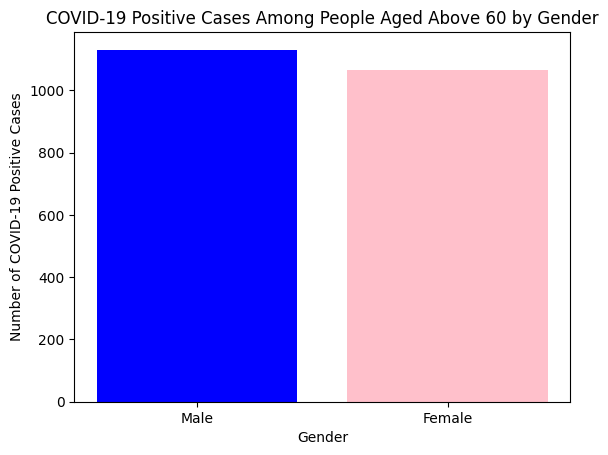

In [447]:
import matplotlib.pyplot as plt

count_male_above60_positive = 1130
count_female_above60_positive = 1066

labels = ['Male', 'Female']
counts = [count_male_above60_positive, count_female_above60_positive]

plt.bar(labels, counts, color=['blue', 'pink'])
plt.xlabel('Gender')
plt.ylabel('Number of COVID-19 Positive Cases')
plt.title('COVID-19 Positive Cases Among People Aged Above 60 by Gender')
plt.show()


1. There is a meaningful difference in the rates of COVID-19 positivity between males and females in the elderly age group (above 60 years old).
2. Gender plays a role in the likelihood of testing positive for COVID-19 among elderly individuals.

In [448]:
#Testing hypothesis 2: Individuals with a higher symptoms are more likely to test positive for COVID-19
from scipy.stats import ttest_ind

positive_cases = new_df_full[new_df_full['Corona'] == 1]['Symptom_severity']
negative_cases = new_df_full[new_df_full['Corona'] == 0]['Symptom_severity']

t_stat, p_value = ttest_ind(positive_cases, negative_cases)
print(f'T-statistic: {t_stat}')
print(f'P-value: {p_value}')


T-statistic: 203.46743097197614
P-value: 0.0


The correlation coefficient is 0.424063, indicating a moderate positive correlation between symptom severity and the likelihood of testing positive for COVID-19.This means that as symptom severity increases, there tends to be a higher probability of testing positive for COVID-19

## Insights

> Hypothesis 1:
* The models indicate that symptom severity is a significant predictor of COVID-19. However, the presence of symptoms like headache, which was ranked high by the Random Forest model, suggests that some symptoms may be more subtle indicators of the disease.

* Despite cough symptoms and fever being the most common symptoms,
the Random Forest model found headache, fever, and sore throat to be the most predictive features. This suggests that while cough is frequent, it is less effective at distinguishing between positive and negative cases compared to other symptoms.
1. A symptom's commonality does not always equate to its predictive strength. Cough is prevalent but may occur in many respiratory conditions, reducing its specificity for COVID-19.
2. The Random Forest model prioritizes features that provide the highest information gain, explaining why headache and sore throat rank higher in predictive importance.

> Hypothesis 2:

While the Chi-Square test indicates a statistically significant association, the practical difference in COVID-19 positivity rates between elderly males and females is relatively small. This suggests that while gender is a factor, it may not be the sole or most critical factor influencing COVID-19 positivity among the elderly.

> The Random Forest model performed best overall, making it a suitable choice for predicting COVID-19 based on symptoms and demographic data

> KNN model provides the best ROC AUC, making it suitable for medical predictions where sensitivity is crucial.

> The severity of symptoms correlates strongly with COVID-19 positive cases.

> Cough and fever are the most indicative symptoms of COVID-19.

> Elderly individuals and those with specific symptoms should be prioritized for COVID-19 testing and care.

##Impact

1. Public Health: Enhanced screening and targeted interventions can be devised based on symptom prevalence and demographic factors.
2. Resource Allocation: Efficient distribution of medical resources by identifying high-risk groups (e.g., elderly males).
3. Preventive Measures: Focused preventive strategies for people with common symptoms and those with known contacts abroad.

## Conclusions

The project demonstrates the potential of machine learning in predicting COVID-19 diagnoses based on symptoms and demographic factors. While the KNN model showed the best performance, other models also provided valuable insights. The combined use of SQL for data extraction and statistical tests for hypothesis validation strengthens the analysis, providing a comprehensive approach to understanding COVID-19 trends and aiding in effective decision-making for public health interventions.